In [ ]:
Analysis 
Observed Trend 1: There are more drivers in the Urban cities then Suburban and Rural areas.
Observed Trend 2: Average Fare price is also higher in rural areas.
Observed Trend 3: Total Rides, Total Drivers and Total Fares all are above 60% in Urban areas.


In [117]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

In [118]:
# Load in csv
city_df = pd.read_csv("raw_data/city_data.csv")
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [119]:
ride_df = pd.read_csv("raw_data/ride_data.csv")
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [120]:
city_ride_df = pd.merge(city_df, ride_df, on='city', how='outer')
city_ride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [121]:
groupbycity_df = city_ride_df.groupby(['city','type'], as_index = False)
ride_df = groupbycity_df['ride_id'].count()
graph_df = ride_df.rename(columns={"ride_id":"Total Number of Rides (Per City)"})
graph_df.head()

,city,type,Total Number of Rides (Per City)
0,Alvarezhaven,Urban,31
1,Alyssaberg,Urban,26
2,Anitamouth,Suburban,9
3,Antoniomouth,Urban,22
4,Aprilchester,Urban,19


In [122]:
avefare_percity= groupbycity_df["fare"].mean()
avefare_percity.head()

,city,type,fare
0,Alvarezhaven,Urban,23.928710
1,Alyssaberg,Urban,20.609615
2,Anitamouth,Suburban,37.315556
3,Antoniomouth,Urban,23.625000
4,Aprilchester,Urban,21.981579


In [123]:
graph_df["Average Fare ($)"] = avefare_percity["fare"]
graph_df.head()

,city,type,Total Number of Rides (Per City),Average Fare ($)
0,Alvarezhaven,Urban,31,23.928710
1,Alyssaberg,Urban,26,20.609615
2,Anitamouth,Suburban,9,37.315556
3,Antoniomouth,Urban,22,23.625000
4,Aprilchester,Urban,19,21.981579


In [124]:
drivers_percity= groupbycity_df["driver_count"].sum()
drivers_percity.head()

,city,type,driver_count
0,Alvarezhaven,Urban,651
1,Alyssaberg,Urban,1742
2,Anitamouth,Suburban,144
3,Antoniomouth,Urban,462
4,Aprilchester,Urban,931


In [125]:
graph_df["Total Number of Drivers Per City"] = drivers_percity["driver_count"]
graph_df.head()

,city,type,Total Number of Rides (Per City),Average Fare ($),Total Number of Drivers Per City
0,Alvarezhaven,Urban,31,23.928710,651
1,Alyssaberg,Urban,26,20.609615,1742
2,Anitamouth,Suburban,9,37.315556,144
3,Antoniomouth,Urban,22,23.625000,462
4,Aprilchester,Urban,19,21.981579,931


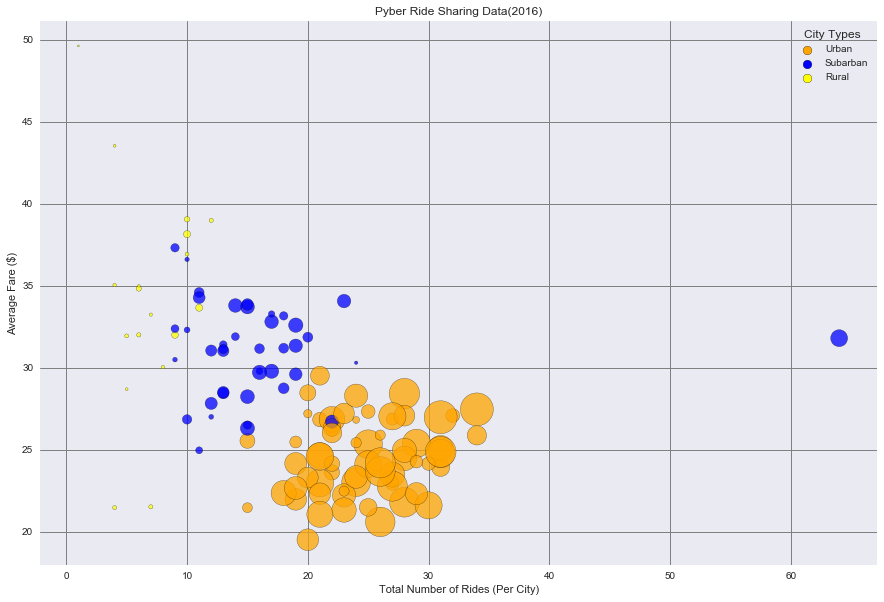

In [132]:
use_colors = {"U": "orange", "S": "blue", "R": "yellow"}
plt.figure(figsize=(15,10))
plt.scatter(x=graph_df['Total Number of Rides (Per City)'],
            y=graph_df['Average Fare ($)'],
            c=[use_colors[x[0]] for x in graph_df['type']],
            s=(graph_df['Total Number of Drivers Per City']*0.5),
            marker ='o',
            edgecolors='black',
            alpha=0.75
            )
plt.grid(True)
plt.grid(color="grey")
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

#Create legend from custom artist/label lists
type1 = plt.scatter([],[], s=75, marker='o', color='orange', edgecolors='black')
type2 =  plt.scatter([],[], s=75, marker='o', color='blue', edgecolors='black')
type3 =  plt.scatter([],[], s=75, marker='o', color='yellow', edgecolors='black')
plt.legend((type1,type2,type3),
           ('Urban', 'Subarban', 'Rural'),
            scatterpoints=1,
            loc='upper right',
            ncol=1,
            fontsize=10,
            title='City Types')
plt.show()

In [133]:
fare_bytype = city_ride_df['fare'].sum()
rides_bytype = city_ride_df['ride_id'].count()
drivers_bytype = city_ride_df['driver_count'].sum()
type_summary = pd.DataFrame([[fare_bytype,rides_bytype,drivers_bytype]])
type_summary.columns = ['Total Fare','Total Rides','Total Drivers']


In [134]:
sorted_df = city_ride_df.sort_values('type')
groupbytype_df = sorted_df.groupby(['type'],as_index=False)
pie_df = groupbytype_df.ride_id.count()


In [135]:
fare_byttype = groupbytype_df.fare.sum()
drivers_bytype = groupbytype_df.driver_count.sum()
pie_df['fare by type'] = fare_byttype.fare
pie_df['driver count'] = drivers_bytype.driver_count


In [136]:
def fareperc(col):
    return (col/type_summary['Total Fare'])*100
def driverperc(col):
    return (col/type_summary['Total Drivers'])*100
def rideperc(col):
    return (col/type_summary['Total Rides'])*100

In [138]:
pie_df['ride_perc'] = pie_df['ride_id'].apply(rideperc)
pie_df['fare_perc'] = pie_df['fare by type'].apply(fareperc)
pie_df['drive_perc'] = pie_df['driver count'].apply(driverperc)


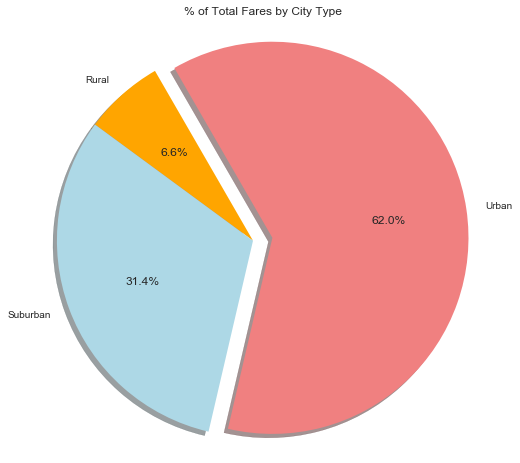

In [139]:
plt.figure(figsize=(8,8))
piecolors = {"U": "lightcoral", "S": "lightblue", "R": "orange"}
colors = [piecolors[x[0]] for x in pie_df['type']]
explode = (0,0,0.1) 
plt.pie(pie_df['fare_perc'], explode=explode, labels=pie_df['type'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Fares by City Type")
plt.axis('equal')
plt.show()

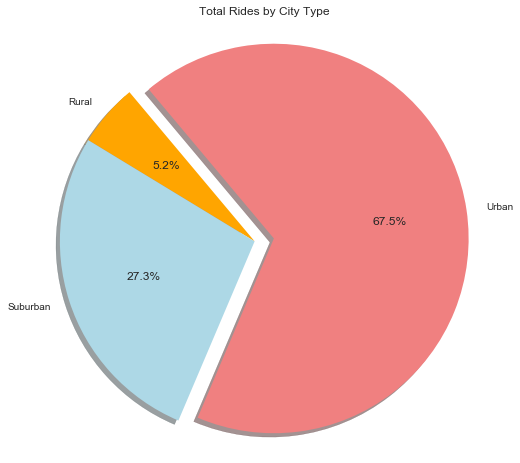

In [141]:
plt.figure(figsize=(8,8))
piecolors = {"U": "lightcoral", "S": "lightblue", "R": "orange"}
colors = [piecolors[x[0]]  for x in pie_df['type']]
explode = (0,0,0.1) 
plt.pie(pie_df['ride_perc'], explode=explode, labels=pie_df['type'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=130)
plt.title("Total Rides by City Type")
plt.axis('equal')
plt.show()

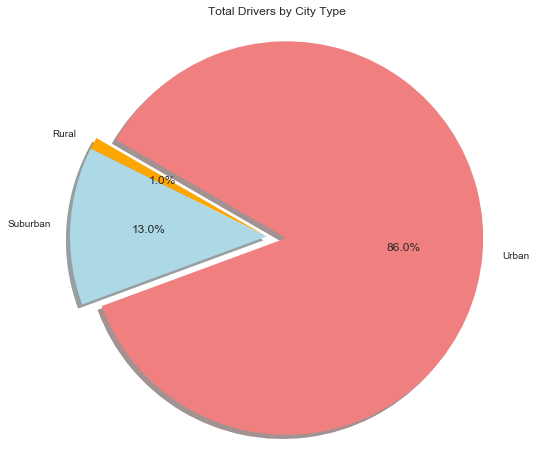

In [142]:
plt.figure(figsize=(8,8))
piecolors = {"U": "lightcoral", "S": "lightblue", "R": "orange"}
colors = [piecolors[x[0]] for x in pie_df['type']]
explode = (0,0,0.1) 
plt.pie(pie_df['drive_perc'], explode=explode, labels=pie_df['type'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("Total Drivers by City Type")
plt.axis('equal')
plt.show()